In [26]:
import pyomo.environ as pyo
import numpy as np
import pandas as pd
from comp import compare

In [27]:
data = pd.read_csv("DebrisFlow.txt",sep='\t',header=None)

In [28]:
model = pyo.ConcreteModel()

In [29]:
I = np.arange(len(data))

In [30]:
model.I = pyo.Set(initialize=I)

In [31]:
model.eps = pyo.Var(model.I,domain = pyo.NonNegativeReals)

In [32]:
model.c = pyo.Var(domain= pyo.NonNegativeReals, bounds =(0,0.3))

In [33]:
model.d = pyo.Var(domain = pyo.Reals, bounds = (-94,25))

In [34]:
def rule_par_x(model,i):
    return data.iloc[i-1][0]


In [35]:
def rule_par_y(model,i):
    return data.iloc[i-1][1]

In [36]:
model.X = pyo.Param(model.I, initialize = rule_par_x)

In [37]:
model.Y = pyo.Param(model.I, initialize = rule_par_y)

In [38]:
def rule_const_1(model,i):
    return model.Y[i] - model.c*model.X[i] - model.d <= model.eps[i]

In [39]:
def rule_const_2(model,i):
    return -1*model.Y[i] + model.c*model.X[i] + model.d <= model.eps[i]

In [40]:
model.const1 = pyo.Constraint(model.I,rule=rule_const_1)

In [41]:
model.const_2 = pyo.Constraint(model.I,rule=rule_const_2)

In [42]:
def rule_obj(model):
    return sum(model.eps[i] for i in model.I)

In [43]:
model.obj = pyo.Objective(rule=rule_obj,sense=pyo.minimize)

In [44]:
result = pyo.SolverFactory('glpk').solve(model,'glpk')

In [45]:
print(result)


Problem: 
- Name: unknown
  Lower bound: 86.8262497581626
  Upper bound: 86.8262497581626
  Number of objectives: 1
  Number of constraints: 89
  Number of variables: 47
  Number of nonzeros: 265
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.10164332389831543
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [46]:
model.display()

Model unknown

  Variables:
    eps : Size=44, Index=I
        Key : Lower : Value                 : Upper : Fixed : Stale : Domain
          0 :     0 :      0.41483784024126 :  None : False : False : NonNegativeReals
          1 :     0 :      1.99053193392577 :  None : False : False : NonNegativeReals
          2 :     0 :      1.87965462312852 :  None : False : False : NonNegativeReals
          3 :     0 :      1.76949595633126 :  None : False : False : NonNegativeReals
          4 :     0 :      1.66011207053399 :  None : False : False : NonNegativeReals
          5 :     0 :      1.54903202298626 :  None : False : False : NonNegativeReals
          6 :     0 :      1.43786606218903 :  None : False : False : NonNegativeReals
          7 :     0 :      1.07812815139174 :  None : False : False : NonNegativeReals
          8 :     0 :     0.718406439594476 :  None : False : False : NonNegativeReals
          9 :     0 :     0.359613610797247 :  None : False : False : NonNegativeReal

In [47]:
c = pyo.value(model.c)

In [48]:
d = pyo.value(model.d)

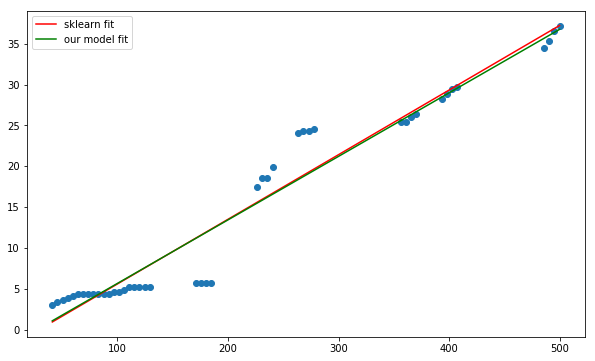

sk learn r2 = 0.9443813234997573
our model r2 = 0.9440419911050367
sk learn model is doing better


In [49]:
compare(c,d)